In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import scipy.stats as stats

In [122]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [123]:
df = pd.read_excel("빚추가마지막.xlsx")
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,2,abled,nowork,NaN,city,405.0,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,남성,1,abled,work,942.0,city,2788.0,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,762.0,city,2304.0,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,855.0,city,5231.0,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,4,abled,work,399.0,city,5231.0,21,0.0,0


In [124]:
df.loc[(df['income']>0)&(df['debt']>0),:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 13473
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5414 non-null   int64  
 1   gen              5414 non-null   object 
 2   age              5414 non-null   int64  
 3   religion         5414 non-null   object 
 4   edu              5414 non-null   object 
 5   sm_year          383 non-null    float64
 6   sm_state         5414 non-null   object 
 7   sm_day           1048 non-null   float64
 8   dr_mean_year     5414 non-null   object 
 9   dr_6cup          2955 non-null   object 
 10  dr_hurt          2955 non-null   object 
 11  dr_worry         2955 non-null   object 
 12  preg_experience  5414 non-null   object 
 13  health_state     5414 non-null   int64  
 14  disabled         5414 non-null   object 
 15  work_state       5414 non-null   object 
 16  work_code        3801 non-null   float64
 17  region           5

In [125]:
df= df.loc[(df['income']>0)&(df['debt']>0),:]

<Axes: xlabel='debt', ylabel='income'>

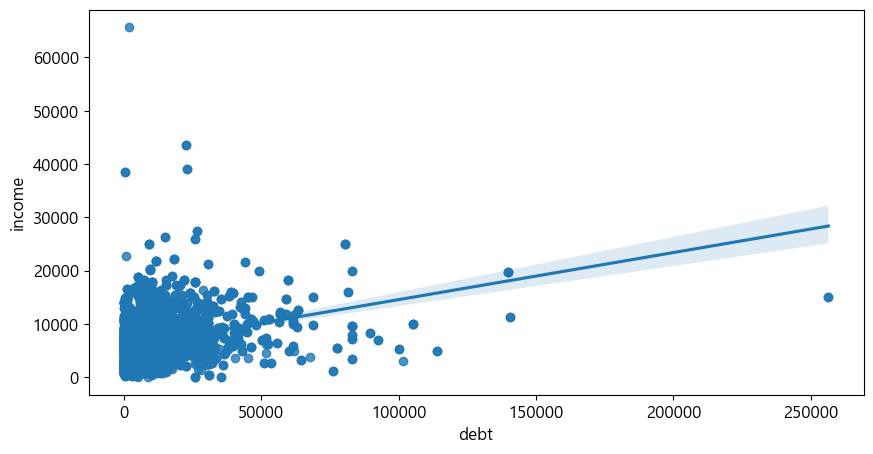

In [126]:
sns.regplot(data=df,x='debt',y='income')

<Axes: xlabel='debt', ylabel='y_total'>

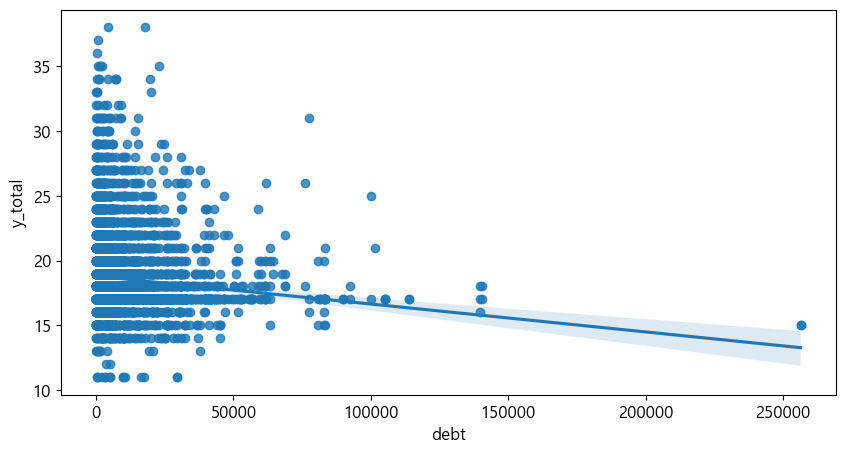

In [127]:
sns.regplot(data=df,x='debt',y='y_total')

In [128]:
corr  = df[['debt','income']].corr()
corr

,debt,income
debt,1.000000,0.300693
income,0.300693,1.000000


In [129]:
bins = [20,29,39,49,59,99]
labels = ['19~29세','30~39세','40~49세','50~59세','60세 이상']

cuts = pd.cut(df['age'],bins,labels=labels)
df['age_range'] = cuts
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,405.0,20,10350.0,0,60세 이상
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,762.0,city,2304.0,18,21220.0,0,60세 이상
8,8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,work,151.0,city,2290.8,21,1020.0,0,50~59세
9,9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,2290.8,17,1020.0,0,30~39세
13,13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,...,4,abled,work,399.0,city,5958.0,20,12921.0,0,40~49세


### 전체적인 경향성은 나이가 많아질수록 우울감이 높게 나타난다. 특히 노년층의 우울감은 굉장히 높다

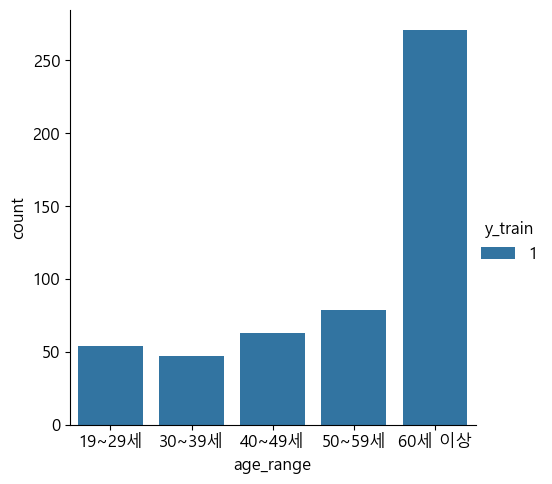

In [130]:
sns.catplot(data=df.loc[df['y_train']==1],x='age_range',kind='count',hue='y_train')

종교에 따른 우울감 경험여부는 차이가 없는것으로 보임

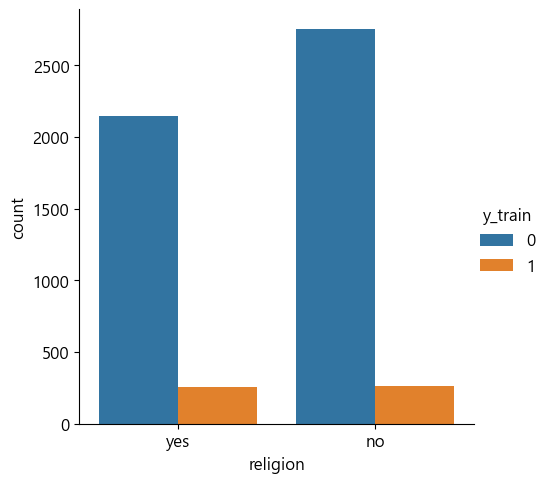

In [131]:
sns.catplot(data=df,x='religion',kind='count',hue='y_train')

교육수준에 따른 우울감 경험여부의 비율은 초졸인 사람들이 가장높았음.

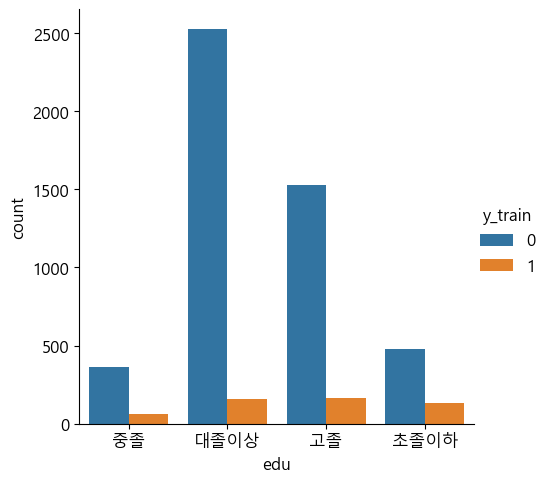

In [132]:
sns.catplot(data=df,x='edu',kind='count',hue='y_train')
plt.show()
plt.close()

흡연여부는 애매함. -> 다운샘플링 진행

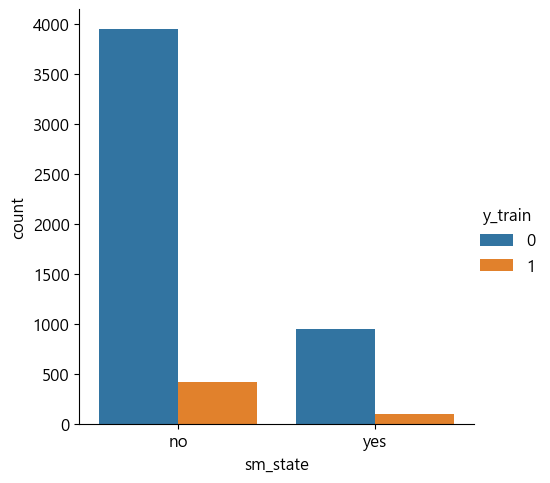

In [133]:
sns.catplot(data=df,x='sm_state',kind='count',hue='y_train')

In [134]:
from sklearn.utils import resample

subset_city_downsampled = resample(df[df['sm_state']=='no'],
                            replace=False,
                            n_samples =1048 ,
                            random_state = 2020)
                            


In [135]:
sm_data = pd.concat([df[df['sm_state']=='yes'],subset_city_downsampled])
sm_data['sm_state'].value_counts()

sm_state
yes    1048
no     1048
Name: count, dtype: int64

별차이 없음>


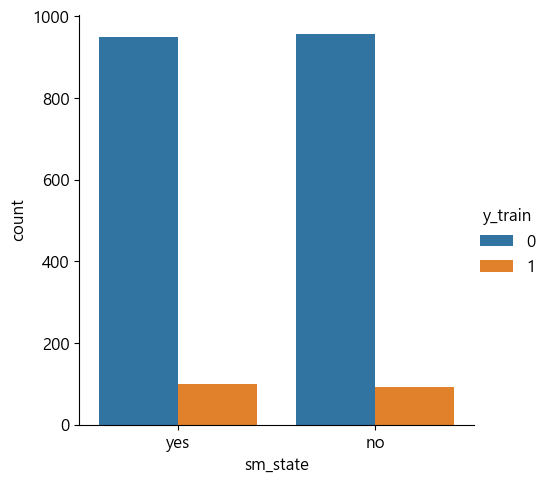

In [136]:
sns.catplot(data=sm_data,x='sm_state',kind='count',hue='y_train')

연평균 음주량도 별 차이 없어보임.

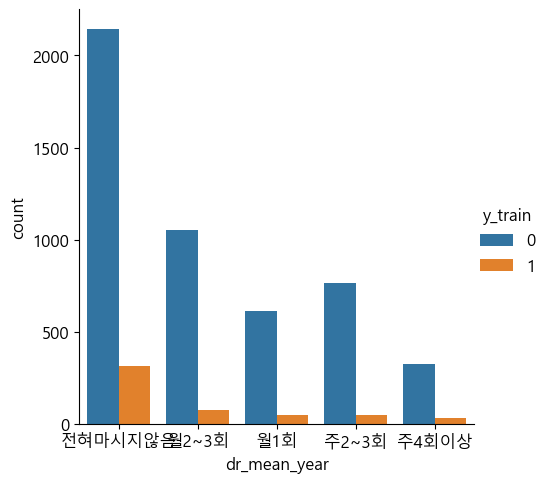

In [137]:
sns.catplot(data=df,x='dr_mean_year',kind='count',hue='y_train')

In [138]:
over_dr = df.loc[df['dr_6cup'].notnull(),:]

over_dr['dr_6cup'].isnull().sum()

0

술을 한번마실때 6잔 이상 마시는 사람들이 우울감을 느끼는가에 대한 가설은 의미 x

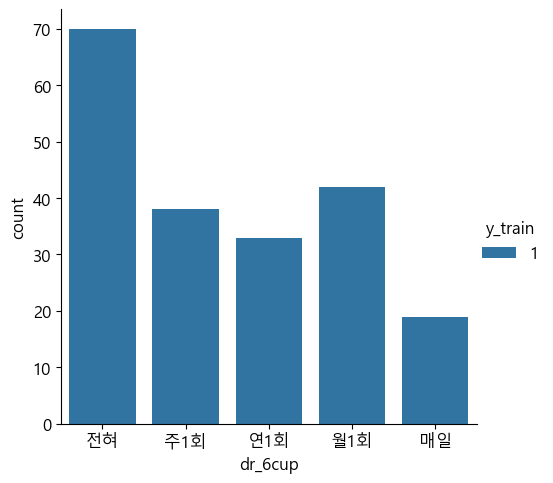

In [139]:
sns.catplot(data=over_dr.loc[over_dr['y_train']==1],x='dr_6cup',kind='count',hue='y_train')

임신경험 여부는 별 차이 없음

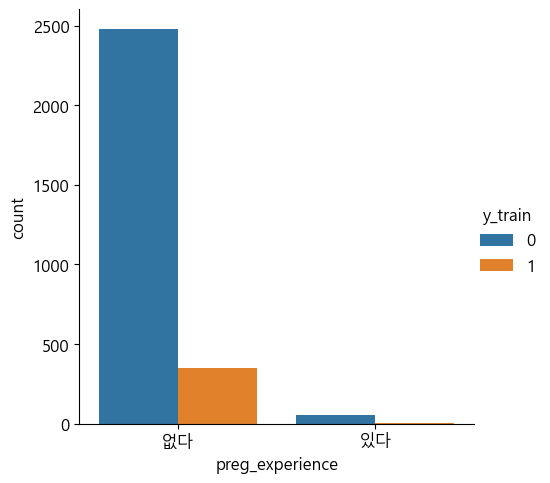

In [140]:
woman = df.loc[df['preg_experience']!='남성']
sns.catplot(data=woman,x='preg_experience',kind='count',hue='y_train')

In [141]:

subset_city_downsampled = resample(woman[woman['preg_experience']=='없다'],
                            replace=False,
                            n_samples =57 ,
                            random_state = 2020)

In [142]:
sm_data = pd.concat([woman[woman['preg_experience']=='있다'],subset_city_downsampled])
sm_data['preg_experience'].value_counts()

preg_experience
있다    57
없다    57
Name: count, dtype: int64

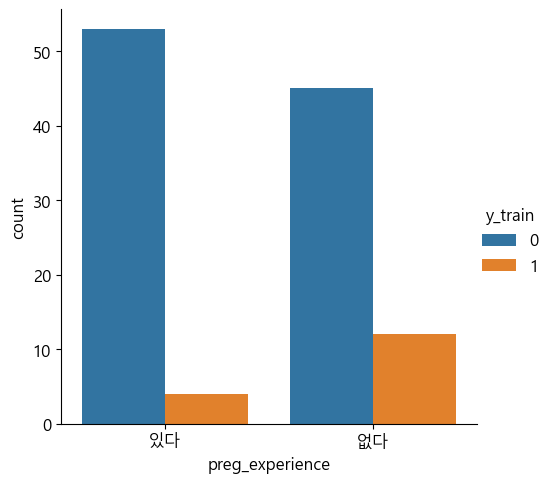

In [143]:
sns.catplot(data=sm_data,x='preg_experience',kind='count',hue='y_train')

건강 만족도가 높아지면 우울감을 경험하는 경우가 적다.

,health_state,y_total
health_state,1.000000,-0.342151
y_total,-0.342151,1.000000


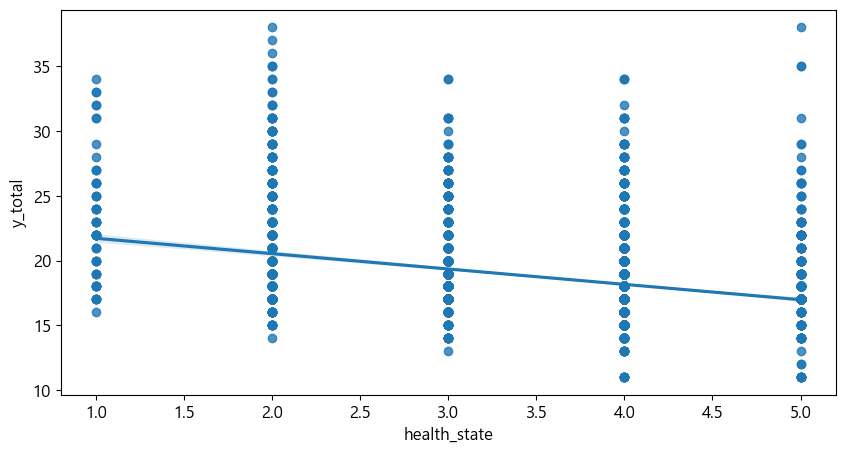

In [144]:
sns.regplot(data=df,x='health_state',y='y_total')
corr = df[['health_state','y_total']].corr(method='pearson')
corr

장애여부는 데이터의 크기 차이가 심해서 비교하기 애매함 -> 다운샘플링

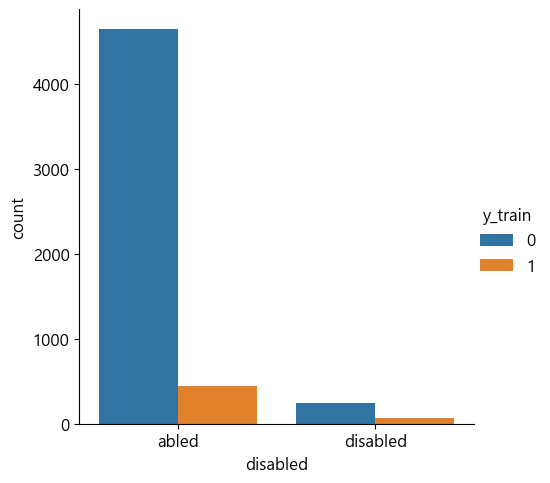

In [145]:
sns.catplot(data=df,x='disabled',kind='count',hue='y_train')

In [146]:
subset_city_downsampled = resample(df[df['disabled']=='abled'],
                            replace=False,
                            n_samples =319 ,
                            random_state = 2020)
able = pd.concat([df[df['disabled']=='disabled'],subset_city_downsampled])
able['disabled'].value_counts()

disabled
abled       319
disabled    318
Name: count, dtype: int64

차이 있음

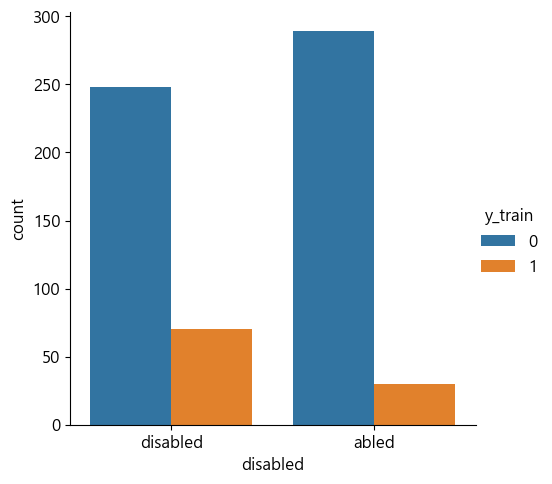

In [147]:
sns.catplot(data=able,x='disabled',kind='count',hue='y_train')

In [148]:
df['work_state'].unique()

array(['nowork', 'work'], dtype=object)

노동여부에 따라 차이 많이 남

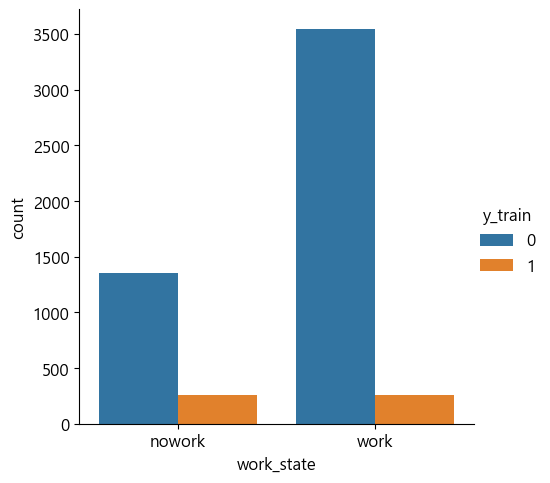

In [149]:
sns.catplot(data=df,x='work_state',kind='count',hue='y_train')

사는 지역에 따라 우울감 경험의차이는 없ㅇ므

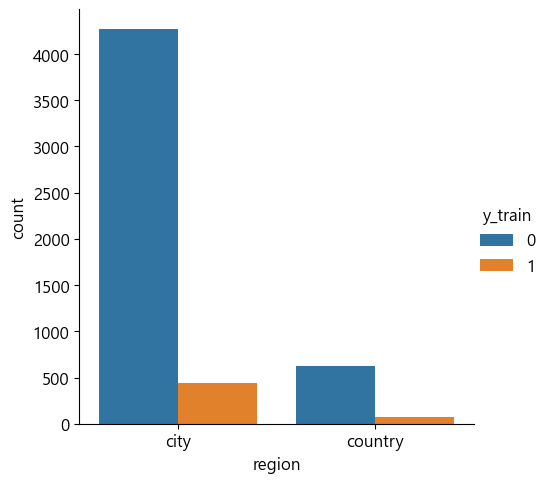

In [150]:
sns.catplot(data=df,x='region',kind='count',hue='y_train')

In [151]:

subset_city_downsampled = resample(df[df['region']=='city'],
                            replace=False,
                            n_samples =696 ,
                            random_state = 2020)
city = pd.concat([df[df['region']=='country'],subset_city_downsampled])
city['region'].value_counts()

region
country    696
city       696
Name: count, dtype: int64

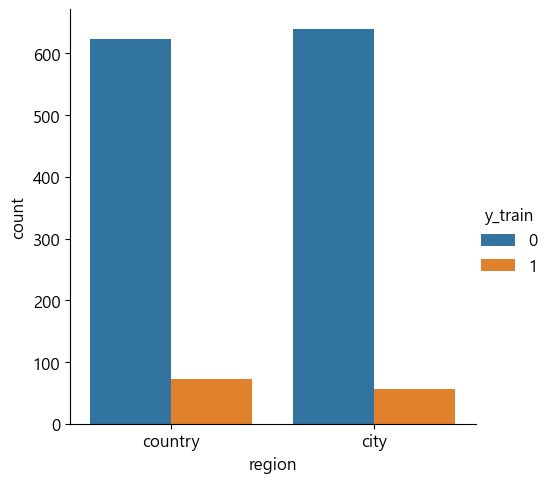

In [152]:
sns.catplot(data=city,x='region',kind='count',hue='y_train')

성별에 따른 차이 잇음

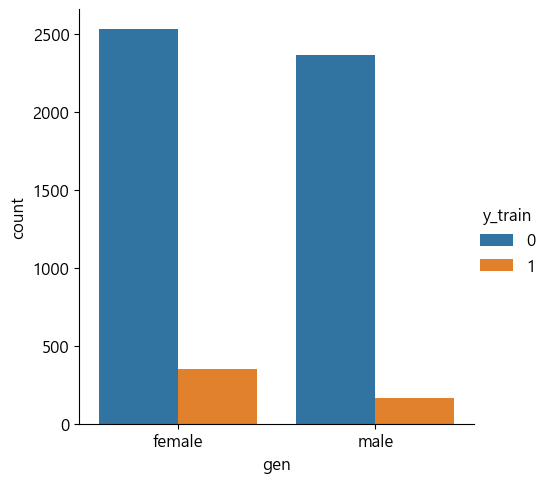

In [153]:
sns.catplot(data=df,x='gen',kind='count',hue='y_train')

In [154]:
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,405.0,20,10350.0,0,60세 이상
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,4,abled,work,762.0,city,2304.0,18,21220.0,0,60세 이상
8,8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,work,151.0,city,2290.8,21,1020.0,0,50~59세
9,9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,2,abled,nowork,NaN,city,2290.8,17,1020.0,0,30~39세
13,13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,...,4,abled,work,399.0,city,5958.0,20,12921.0,0,40~49세


In [155]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range'],
      dtype='object')

In [156]:
df['age_range']= df['age_range'].astype('str')
df['age_range'].unique()

array(['60세 이상', '50~59세', '30~39세', '40~49세', '19~29세', 'nan'],
      dtype=object)

In [157]:
df['age_range'] = df['age_range'].fillna(0)
df = df.loc[df['age_range']!=0,:]


In [158]:
df.isnull().sum()

Unnamed: 0            0
gen                   0
age                   0
religion              0
edu                   0
sm_year            5031
sm_state              0
sm_day             4366
dr_mean_year          0
dr_6cup            2459
dr_hurt            2459
dr_worry           2459
preg_experience       0
health_state          0
disabled              0
work_state            0
work_code          1613
region                0
income                0
y_total               0
debt                  0
y_train               0
age_range             0
dtype: int64

In [159]:
from statsmodels.formula.api import logit

In [160]:
pd.set_option("display.max_rows", None)

In [161]:
df['log_income'] = np.log1p(df['income'])
df['log_debt'] = np.log1p(df['debt'])


In [162]:
df.columns

Index(['Unnamed: 0', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'y_total', 'debt', 'y_train',
       'age_range', 'log_income', 'log_debt'],
      dtype='object')

In [187]:
test = df.copy()
test = test.loc[:,['gen','edu','health_state','disabled','work_state','y_total','age_range','log_income','log_debt']]
test.head()

KeyError: "['y_total'] not in index"

In [164]:
df=df.loc[:,['gen','edu','health_state','disabled','work_state','y_train','age_range','log_income','log_debt']]
df.head()

,gen,edu,health_state,disabled,work_state,y_train,age_range,log_income,log_debt
0,female,중졸,2,abled,nowork,0,60세 이상,6.006353,9.244838
2,male,대졸이상,4,abled,work,0,60세 이상,7.742836,9.962747
8,female,고졸,2,abled,work,0,50~59세,7.737093,6.928538
9,female,중졸,2,abled,nowork,0,30~39세,7.737093,6.928538
13,male,대졸이상,4,abled,work,0,40~49세,8.692658,9.466687


In [165]:
df['edu'].value_counts()

edu
대졸이상    2686
고졸      1690
초졸이하     607
중졸       431
Name: count, dtype: int64

In [166]:
df.head()

,gen,edu,health_state,disabled,work_state,y_train,age_range,log_income,log_debt
0,female,중졸,2,abled,nowork,0,60세 이상,6.006353,9.244838
2,male,대졸이상,4,abled,work,0,60세 이상,7.742836,9.962747
8,female,고졸,2,abled,work,0,50~59세,7.737093,6.928538
9,female,중졸,2,abled,nowork,0,30~39세,7.737093,6.928538
13,male,대졸이상,4,abled,work,0,40~49세,8.692658,9.466687


In [167]:
df.loc[df['gen']=='male','gen']=1
df.loc[df['gen']=='female','gen']=2

df.loc[df['edu']=='초졸이하','edu']=1
df.loc[df['edu']=='중졸','edu']=2
df.loc[df['edu']=='고졸','edu']=3
df.loc[df['edu']=='대졸이상','edu']=4

df.loc[df['disabled']=='disabled','disabled']=1
df.loc[df['disabled']=='abled','disabled']=2


df.loc[df['work_state']=='work','work_state']=1
df.loc[df['work_state']=='nowork','work_state']=2


In [168]:
test.head()

,gen,edu,health_state,disabled,work_state,y_total,age_range,log_income,log_debt
0,female,중졸,2,abled,nowork,20,60세 이상,6.006353,9.244838
2,male,대졸이상,4,abled,work,18,60세 이상,7.742836,9.962747
8,female,고졸,2,abled,work,21,50~59세,7.737093,6.928538
9,female,중졸,2,abled,nowork,17,30~39세,7.737093,6.928538
13,male,대졸이상,4,abled,work,20,40~49세,8.692658,9.466687


In [169]:
test.loc[test['gen']=='male','gen']=1
test.loc[test['gen']=='female','gen']=2

test.loc[test['edu']=='초졸이하','edu']=1
test.loc[test['edu']=='중졸','edu']=2
test.loc[test['edu']=='고졸','edu']=3
test.loc[test['edu']=='대졸이상','edu']=4

test.loc[test['disabled']=='disabled','disabled']=1
test.loc[test['disabled']=='abled','disabled']=2


test.loc[test['work_state']=='work','work_state']=1
test.loc[test['work_state']=='nowork','work_state']=2

test['age_range'] = test['age_range'].astype('str')
test.loc[test['age_range']=='19~29세','age_range']=1
test.loc[test['age_range']=='30~39세','age_range']=2
test.loc[test['age_range']=='40~49세','age_range']=3
test.loc[test['age_range']=='50~59세','age_range']=4
test.loc[test['age_range']=='60세 이상','age_range']=5
test['age_range'] = test['age_range'].astype('category')

test['age_range']=test['age_range'].astype(str)
test= test.loc[test['age_range']!='nan',:]
test['age_range']=test['age_range'].astype("category")


test= pd.get_dummies(test,drop_first=True,dtype='int')
test.columns



Index(['health_state', 'y_total', 'log_income', 'log_debt', 'gen_2', 'edu_2',
       'edu_3', 'edu_4', 'disabled_2', 'work_state_2', 'age_range_2',
       'age_range_3', 'age_range_4', 'age_range_5'],
      dtype='object')

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 13473
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gen           5414 non-null   object 
 1   edu           5414 non-null   object 
 2   health_state  5414 non-null   int64  
 3   disabled      5414 non-null   object 
 4   work_state    5414 non-null   object 
 5   y_train       5414 non-null   int64  
 6   age_range     5414 non-null   object 
 7   log_income    5414 non-null   float64
 8   log_debt      5414 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 423.0+ KB


In [171]:
df['age_range'] = df['age_range'].astype('str')
df.loc[df['age_range']=='19~29세','age_range']=1
df.loc[df['age_range']=='30~39세','age_range']=2
df.loc[df['age_range']=='40~49세','age_range']=3
df.loc[df['age_range']=='50~59세','age_range']=4
df.loc[df['age_range']=='60세 이상','age_range']=5
df['age_range'] = df['age_range'].astype('category')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 13473
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gen           5414 non-null   object  
 1   edu           5414 non-null   object  
 2   health_state  5414 non-null   int64   
 3   disabled      5414 non-null   object  
 4   work_state    5414 non-null   object  
 5   y_train       5414 non-null   int64   
 6   age_range     5414 non-null   category
 7   log_income    5414 non-null   float64 
 8   log_debt      5414 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(4)
memory usage: 386.2+ KB


In [173]:
df['age_range'].unique()

[5, 4, 2, 3, 1, 'nan']
Categories (6, object): [1, 2, 3, 4, 5, 'nan']

In [174]:
df['age_range']=df['age_range'].astype(str)
df= df.loc[df['age_range']!='nan',:]
df['age_range']=df['age_range'].astype("category")


In [175]:
df['age_range'].unique()

['5', '4', '2', '3', '1']
Categories (5, object): ['1', '2', '3', '4', '5']

In [177]:
df.columns

Index(['gen', 'edu', 'health_state', 'disabled', 'work_state', 'y_train',
       'age_range', 'log_income', 'log_debt'],
      dtype='object')

In [178]:
from sklearn.preprocessing import OneHotEncoder

In [179]:
test= pd.get_dummies(df,drop_first=True,dtype='int')
df.head()

,gen,edu,health_state,disabled,work_state,y_train,age_range,log_income,log_debt
0,2,2,2,2,2,0,5,6.006353,9.244838
2,1,4,4,2,1,0,5,7.742836,9.962747
8,2,3,2,2,1,0,4,7.737093,6.928538
9,2,2,2,2,2,0,2,7.737093,6.928538
13,1,4,4,2,1,0,3,8.692658,9.466687


In [180]:
# df = df.drop(['age_range_nan'],axis=1)
# df.columns

In [181]:
test.head()

,health_state,y_train,log_income,log_debt,gen_2,edu_2,edu_3,edu_4,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5
0,2,0,6.006353,9.244838,1,1,0,0,1,1,0,0,0,1
2,4,0,7.742836,9.962747,0,0,0,1,1,0,0,0,0,1
8,2,0,7.737093,6.928538,1,0,1,0,1,0,0,0,1,0
9,2,0,7.737093,6.928538,1,1,0,0,1,1,1,0,0,0
13,4,0,8.692658,9.466687,0,0,0,1,1,0,0,1,0,0


In [182]:
test.columns

Index(['health_state', 'y_train', 'log_income', 'log_debt', 'gen_2', 'edu_2',
       'edu_3', 'edu_4', 'disabled_2', 'work_state_2', 'age_range_2',
       'age_range_3', 'age_range_4', 'age_range_5'],
      dtype='object')

In [183]:
cnames = ['health_state','log_income','log_debt','gen_2','edu_2','edu_3','edu_4','disabled_2','work_state_2','age_range_2','age_range_3','age_range_4','age_range_5']
cnames



['health_state',
 'log_income',
 'log_debt',
 'gen_2',
 'edu_2',
 'edu_3',
 'edu_4',
 'disabled_2',
 'work_state_2',
 'age_range_2',
 'age_range_3',
 'age_range_4',
 'age_range_5']

In [184]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [186]:
test.head()

,health_state,y_train,log_income,log_debt,gen_2,edu_2,edu_3,edu_4,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5
0,2,0,6.006353,9.244838,1,1,0,0,1,1,0,0,0,1
2,4,0,7.742836,9.962747,0,0,0,1,1,0,0,0,0,1
8,2,0,7.737093,6.928538,1,0,1,0,1,0,0,0,1,0
9,2,0,7.737093,6.928538,1,1,0,0,1,1,1,0,0,0
13,4,0,8.692658,9.466687,0,0,0,1,1,0,0,1,0,0


In [185]:
model = ols('y_total~ C(health_state)+log_income+log_debt+C(gen_2)+C(edu_2)+C(edu_3)+C(edu_4)+C(disabled_2)+C(work_state_2)+C(age_range_2)+C(age_range_3)+C(age_range_4)+C(age_range_5)', data = test)
fit = model.fit()

fit.summary

PatsyError: Error evaluating factor: NameError: name 'y_total' is not defined
    y_total~ C(health_state)+log_income+log_debt+C(gen_2)+C(edu_2)+C(edu_3)+C(edu_4)+C(disabled_2)+C(work_state_2)+C(age_range_2)+C(age_range_3)+C(age_range_4)+C(age_range_5)
    ^^^^^^^

In [125]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                y_total   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     71.42
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          9.36e-211
Time:                        10:06:23   Log-Likelihood:                -13053.
No. Observations:                5405   AIC:                         2.614e+04
Df Residuals:                    5388   BIC:                         2.625e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               27.8357 

In [118]:
test.head()

,health_state,y_total,log_income,log_debt,gen_2,edu_2,edu_3,edu_4,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5
0,2,20,6.006353,9.244838,1,1,0,0,1,1,0,0,0,1
2,4,18,7.742836,9.962747,0,0,0,1,1,0,0,0,0,1
8,2,21,7.737093,6.928538,1,0,1,0,1,0,0,0,1,0
9,2,17,7.737093,6.928538,1,1,0,0,1,1,1,0,0,0
13,4,20,8.692658,9.466687,0,0,0,1,1,0,0,1,0,0


In [119]:
test.dtypes

health_state      int64
y_total           int64
log_income      float64
log_debt        float64
gen_2             int32
edu_2             int32
edu_3             int32
edu_4             int32
disabled_2        int32
work_state_2      int32
age_range_2       int32
age_range_3       int32
age_range_4       int32
age_range_5       int32
dtype: object

In [121]:
model = sm.OLS('y_total~ C(health_state)+log_income+log_debt+C(gen_2)+C(edu_2)+C(edu_3)+C(edu_4)+C(disabled_2)+C(work_state_2)+C(age_range_2)+C(age_range_3)+C(age_range_4)+C(age_range_5)', data = test).fit()

print(model.summary())

ValueError: unrecognized data structures: <class 'str'> / <class 'NoneType'>

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                y_total   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          1.330e+04
Date:                Mon, 14 Aug 2023   Prob (F-statistic):                        0.00
Time:                        09:48:03   Log-Likelihood:                         -14077.
No. Observations:                5405   AIC:                                  2.818e+04
Df Residuals:                    5392   BIC:                                  2.827e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [61]:
model = logit('y_train ~df[cnames]',data = df)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.271050
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                 5405
Model:                          Logit   Df Residuals:                     5391
Method:                           MLE   Df Model:                           13
Date:                Sat, 12 Aug 2023   Pseudo R-squ.:                  0.1373
Time:                        16:35:05   Log-Likelihood:                -1465.0
converged:                       True   LL-Null:                       -1698.1
Covariance Type:            nonrobust   LLR p-value:                 2.198e-91
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4670      0.655      6.824      0.000       3.184       5.750
df[cnames][0]    

In [64]:
cnames

['health_state',
 'log_income',
 'log_debt',
 'gen_2',
 'edu_2',
 'edu_3',
 'edu_4',
 'disabled_2',
 'work_state_2',
 'age_range_2',
 'age_range_3',
 'age_range_4',
 'age_range_5']

In [60]:

df[cnames][2]  -> log_debt
df[cnames][4]  -> edu_2
df[cnames][5] -> edu_3
df[cnames][6] -> edu_4
df[cnames][9]  -> age_range_2

In [63]:
df.head()

,health_state,y_train,log_income,log_debt,gen_2,edu_2,edu_3,edu_4,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5
0,2,0,6.006353,9.244838,1,1,0,0,1,1,0,0,0,1
2,4,0,7.742836,9.962747,0,0,0,1,1,0,0,0,0,1
8,2,0,7.737093,6.928538,1,0,1,0,1,0,0,0,1,0
9,2,0,7.737093,6.928538,1,1,0,0,1,1,1,0,0,0
13,4,0,8.692658,9.466687,0,0,0,1,1,0,0,1,0,0


In [65]:
df.drop(['log_debt','edu_2','edu_3','edu_4','age_range_2'],axis=1,inplace=True)
df.head()


,health_state,y_train,log_income,gen_2,disabled_2,work_state_2,age_range_3,age_range_4,age_range_5
0,2,0,6.006353,1,1,1,0,0,1
2,4,0,7.742836,0,1,0,0,0,1
8,2,0,7.737093,1,1,0,0,1,0
9,2,0,7.737093,1,1,1,0,0,0
13,4,0,8.692658,0,1,0,1,0,0


In [67]:
cnames2=['health_state','log_income','gen_2','disabled_2','work_state_2','age_range_3','age_range_4','age_range_5']
cnames2

['health_state',
 'log_income',
 'gen_2',
 'disabled_2',
 'work_state_2',
 'age_range_3',
 'age_range_4',
 'age_range_5']

In [68]:
df.head()

,health_state,y_train,log_income,gen_2,disabled_2,work_state_2,age_range_3,age_range_4,age_range_5
0,2,0,6.006353,1,1,1,0,0,1
2,4,0,7.742836,0,1,0,0,0,1
8,2,0,7.737093,1,1,0,0,1,0
9,2,0,7.737093,1,1,1,0,0,0
13,4,0,8.692658,0,1,0,1,0,0


In [69]:
model2 = logit('y_train ~ df[cnames2]',data = df)
fit2 = model2.fit()
print(fit2.summary())

Optimization terminated successfully.
         Current function value: 0.271699
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                 5405
Model:                          Logit   Df Residuals:                     5396
Method:                           MLE   Df Model:                            8
Date:                Sat, 12 Aug 2023   Pseudo R-squ.:                  0.1352
Time:                        16:40:45   Log-Likelihood:                -1468.5
converged:                       True   LL-Null:                       -1698.1
Covariance Type:            nonrobust   LLR p-value:                 4.012e-94
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.0694      0.619      6.573      0.000       2.856       5.283
df[cnames2][0]   

In [70]:
model2 = logit('y_train ~ log_income+gen_2+health_state_2+health_state_3+health_state_4+health_state_5+age_range_3',data = df)
fit2 = model2.fit()
print(fit2.summary())

Optimization terminated successfully.
         Current function value: 0.272791
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                 5405
Model:                          Logit   Df Residuals:                     5397
Method:                           MLE   Df Model:                            7
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.1317
Time:                        17:45:27   Log-Likelihood:                -1474.4
converged:                       True   LL-Null:                       -1698.1
Covariance Type:            nonrobust   LLR p-value:                 1.636e-92
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4797      0.575      6.054      0.000       2.353       4.606
log_income       

In [71]:
model2 = logit('y_train ~ log_income+gen_2+health_state_2+health_state_3+health_state_4+health_state_5',data = df)
fit2 = model2.fit()
print(fit2.summary())

Optimization terminated successfully.
         Current function value: 0.273012
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                 5405
Model:                          Logit   Df Residuals:                     5398
Method:                           MLE   Df Model:                            6
Date:                Fri, 11 Aug 2023   Pseudo R-squ.:                  0.1310
Time:                        17:45:45   Log-Likelihood:                -1475.6
converged:                       True   LL-Null:                       -1698.1
Covariance Type:            nonrobust   LLR p-value:                 5.926e-93
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5761      0.573      6.245      0.000       2.454       4.698
log_income       